# Tarea 1. Python

Procesamiento de Lenguaje Natural

Eric Lemus Avalos 


## 1. Construcción del corpus 

En este punto, proporcionamos el enlace a la carpeta de Google Drive que contiene las versiones estenográficas de las conferencias de **Andrés Manuel López Obrador** y **Claudia Sheinbaum**. 


**Enlace:** [data](https://drive.google.com/drive/folders/1S72GSBpY5HJcz8ioo8etj2uJHwhqds-l?usp=sharing)




## 2. Vistazo a los datos

1. Cargue todas las conferencias en un _string_ y aplique la función `split` para generar tokens fácilmente.  
2. Cuente la cantidad total de palabras en todas las conferencias.  

In [2]:
import polars as pl
import nltk

#cargamos los datos, del proyecto pasado
data = pl.read_parquet("data/transcripts.parquet")
print(data.head())
print(data.tail())
print(f"Numero de conferencias: {data.shape[0]}")

shape: (5, 5)
┌──────────────────────────────┬─────────────────────────────┬───────────┬────────────┬────────────┐
│ Conferencia                  ┆ Contenido                   ┆ Autor     ┆ Fecha      ┆ Repeticion │
│ ---                          ┆ ---                         ┆ ---       ┆ ---        ┆ ---        │
│ str                          ┆ str                         ┆ str       ┆ str        ┆ u32        │
╞══════════════════════════════╪═════════════════════════════╪═══════════╪════════════╪════════════╡
│ Estenografica mensaje de la  ┆ PRESIDENTA CLAUDIA          ┆ Sheinbaum ┆ 2024-10-01 ┆ 1          │
│ pr…                          ┆ SHEINBAUM P…                ┆           ┆            ┆            │
│ Estenografica toma de        ┆ MODERADORA 1: Mexicanas y   ┆ Sheinbaum ┆ 2024-10-01 ┆ 2          │
│ protesta…                    ┆ mexi…                       ┆           ┆            ┆            │
│ Estenografica toma de        ┆ IFIGENIA MARTÍNEZ Y         ┆ Sheinbaum ┆ 20

In [23]:
all_text = " ".join(data["Contenido"])  # 1
tokens = all_text.split()  

# 2.
total_words = len(tokens)
print(f"Palabras totales: {total_words}")

Palabras totales: 17286432


3. Extraiga el vocabulario del corpus y muestre su longitud de todo el corpus.  


In [24]:
vocabulario = len(set(tokens))
print(vocabulario)

536097


4.  Mida la riqueza del vocabulario de alguna forma en todos los documentos.

Utilizamos la función presente en el [capítulo 1 del libro de nltk ](https://www.nltk.org/book/ch01.html).

In [9]:
def lexical_diversity(text):
    return len(text) / len(set(text))


In [25]:
riqueza = lexical_diversity(tokens)
print(f"Riqueza del vocabulario: {riqueza:.2f}")


Riqueza del vocabulario: 32.24


In [44]:
# Calcular la diversidad léxica para cada conferencia individualmente
data = data.with_columns(
    pl.col("Contenido")
    .map_elements(lambda x: lexical_diversity(x.split())) 
    .alias("Diversidad_Léxica")
)

print(data.head())

C:\Users\ericl\AppData\Local\Temp\ipykernel_3572\3852844661.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  data = data.with_columns(


shape: (5, 6)
┌────────────────────┬───────────────────┬───────────┬────────────┬────────────┬───────────────────┐
│ Conferencia        ┆ Contenido         ┆ Autor     ┆ Fecha      ┆ Repeticion ┆ Diversidad_Léxica │
│ ---                ┆ ---               ┆ ---       ┆ ---        ┆ ---        ┆ ---               │
│ str                ┆ str               ┆ str       ┆ str        ┆ u32        ┆ f64               │
╞════════════════════╪═══════════════════╪═══════════╪════════════╪════════════╪═══════════════════╡
│ Estenografica      ┆ PRESIDENTA        ┆ Sheinbaum ┆ 2024-10-01 ┆ 1          ┆ 2.696912          │
│ mensaje de la pr…  ┆ CLAUDIA SHEINBAUM ┆           ┆            ┆            ┆                   │
│                    ┆ P…                ┆           ┆            ┆            ┆                   │
│ Estenografica toma ┆ MODERADORA        ┆ Sheinbaum ┆ 2024-10-01 ┆ 2          ┆ 2.96482           │
│ de protesta…       ┆ 1: Mexicanas y    ┆           ┆            ┆          

5. Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. 

In [33]:
text = all_text.lower()
tokens_low = text.split()
print(f"Palabras totales: {len(tokens_low)}")

vocabulario = set(tokens_low)
print(f"Vocabulario: {len(vocabulario)}")

riqueza = len(tokens_low) / len(vocabulario)

print(f"Riqueza del vocabulario: {riqueza:.4f}")

Palabras totales: 17286432
Vocabulario: 513492
Riqueza del vocabulario: 33.6645


Obtenemos un vocabulario más corto pero con mayor riqueza léxica. Antes de convertir el texto a minúsculas, reconocíamos como diferentes tokens a palabras iguales.

6. Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador `RegexpTokenizer` de `nltk`, con una expresión regular que extraiga solo tokens que contengan únicamente letras  mayúsculas y minúsculas. Después, cargue los tokens en un objeto `Text` de `nltk` en lugar de una lista de python.


In [31]:
from nltk.tokenize import RegexpTokenizer
from nltk import Text

# 1. Cargar los datos desde el archivo Parquet
data = pl.read_parquet("data/transcripts.parquet")
all_text = " ".join(data["Contenido"].to_list())

tokenizer = RegexpTokenizer(r'\b[A-Za-z]+\b')
tokens = tokenizer.tokenize(all_text)

tokens[:10]

['PRESIDENTA',
 'CLAUDIA',
 'SHEINBAUM',
 'PARDO',
 'Amigas',
 'amigos',
 'El',
 'de',
 'hoy',
 'inicia']

In [27]:
vocabulario = len(set(tokens))
print(vocabulario)

93226


In [28]:
nltk_text = Text(tokens)

print(type(nltk_text))
print("Número de tokens:", len(nltk_text))
print("set tokens en el objeto Text:", len(set(nltk_text)))

<class 'nltk.text.Text'>
Número de tokens: 15587381
set tokens en el objeto Text: 93226


In [30]:
riqueza = lexical_diversity(tokens)
print(f"Diversidad léxica (TweetTokenizer): {riqueza:.2f}")

Diversidad léxica (TweetTokenizer): 167.20


7. Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 usando el tokenizador `TweetTokenizer`. 

In [33]:
from nltk.tokenize import TweetTokenizer

data = pl.read_parquet("data/transcripts.parquet")
all_text = " ".join(data["Contenido"].to_list())
all_text = all_text.lower()

tweet_tokenizer = TweetTokenizer()
tokens_tweettok = tweet_tokenizer.tokenize(all_text)
vocabulario = set(tokens_tweettok)
riqueza = lexical_diversity(tokens_tweettok)

print(f"Palabras totales: {len(tokens_tweettok)}")
print(f"Vocabulario: {len(vocabulario)}")
print(f"Riqueza del vocabulario: {riqueza:.2f}")



Palabras totales: 20360016
Vocabulario: 228505
Riqueza del vocabulario: 89.10



Utilizando `RegexpTokenizer` la diversidad léxica aumentó significativamente a **167.20**. Esto se debe a que se eliminaron caracteres no alfabéticos (números, símbolos, etc.), lo que redujo el ruido en el corpus y permitió una mejor identificación de palabras únicas. Mientras que utlizando `TweetTokenizer` la disminuyó a **89.10**, pero el vocabulario aumentó a 228,505 palabras. Este tokenizador capturando más variantes de palabras, lo que aumenta el tamaño del vocabulario pero reduce la diversidad léxica debido al mayor número de palabras totales.

## 3. Funciones NLTK

1. Utilice la función `concordance` para ver el contexto de **5 palabras** que usted elija. 


In [43]:
# Cosiderando el último punto del problema 2 
conf_tokenizadas = Text(tokens_tweettok)

conf_tokenizadas.concordance("cartel",lines = 5)

Displaying 5 of 63 matches:
levantamos carteles ; yo levanté un cartel durante todo el evento que decía : 
 su plaquita : ‘ esto se obtuvo del cartel fulano o mengano . esto se obtuvo d
ebles tienen ustedes decomisados al cartel de sinaloa o a ‘ el chapo ’ guzmán 
ión que era el brazo financiero del cartel jalisco nueva generación ¿ qué tant
an a alfonso durazo de estar con el cartel jalisco nueva generación . ¿ qué po


In [37]:
conf_tokenizadas.concordance("becas",lines = 5)

Displaying 5 of 2589 matches:
ensión a personas con discapacidad ; becas ‘ benito juárez ’ para estudiantes d
studiantes de preparatoria pública ; becas a estudiantes de escasos recursos ; 
 no abandonen la escuela . ya tienen becas todos los estudiantes de preparatori
ensión a personas con discapacidad ; becas ‘ benito juárez ’ para estudiantes d
studiantes de preparatoria pública ; becas a estudiantes de escasos recursos ; 


In [38]:
conf_tokenizadas.concordance("seguridad",lines = 5)

Displaying 5 of 14915 matches:
 para todos aquellos que no tienen seguridad social va a haber un programa de v
garantizar la obligatoriedad de la seguridad social para las y los trabajadores
 no hay país ! 63 . garantizaremos seguridad social a los jornaleros agrícolas 
tra convicción sigue siendo que la seguridad y la paz son fruto de la justicia 
teligencia e investigación para la seguridad pública . y aumentaremos la coordi


In [40]:
conf_tokenizadas.concordance("mayo",lines = 5)

Displaying 5 of 2065 matches:
al , de chiapas.moderadora 2 : mujer mayo , sonora.moderadora 1 : guarijía , d
s hombres.rita cetina nació el 22 de mayo de 1846 en mérida , yucatán , dentro
nformación tras la detención de ‘ el mayo ’ zambada . ¿ su gobierno va a neces
ma judicial.del 30 de marzo al 28 de mayo será el periodo de campañas de las c
tificial , el original corresponde a mayo de 2024 , cuando la entonces candida


In [41]:
conf_tokenizadas.concordance("inseguridad",lines = 5)

Displaying 5 of 1172 matches:
cipios donde hay altos índices de inseguridad , mejorando el entorno también se
n interesados en esta zona ? ¿ la inseguridad en algunas otras ha modificado la
r con la atención a las causas de inseguridad es el acceso a programas de preve
ación ; una mesa de trabajo sobre inseguridad en carretera , que es un tema que
ciente en cantidad y calidad . la inseguridad alimentaria tiene grandes costos 


 2. Elija una palabra interesante, muestre palabras con uso similar y sus contextos comunes.

Considerando la palabra **cartel** ya que esta palabra esta asociada al nartotrafico y actos de insegurdad, por lo que puede estar acomanadas de nombres de personas que se dedican al narcotrafico. 




In [47]:
conf_tokenizadas.similar("cartel")

año país pueblo gobierno estado momento programa tema proyecto mensaje
caso informe hospital apoyo grupo tiempo plan juicio video problema


In [51]:
conf_tokenizadas.common_contexts(["cartel"])

del_jalisco del_de del_del el_de al_del un_en el_antitaurino
un_durante del_fulano al_de el_jalisco un_ya un_se otro_que un_a
un_planteando este_pues un_diciendo un_es un_mágico


In [48]:
conf_tokenizadas.common_contexts(["cartel","mensaje"])

del_de el_de al_del un_en un_durante al_de un_se otro_que un_a
este_pues un_diciendo un_es un_que el_esta el_al el_del el_el un_un
el_este un_esta


Las palabras similares incluyen términos como "gobierno", "estado" y "programa", lo que sugiere que "cartel" puede aparecer en contextos políticos o de organización. Los contextos comunes también indican que "cartel" a menudo aparece junto con preposiciones y artículos, lo que refuerza su uso en frases descriptivas o narrativas.

3. Utilizando una librería `time`.  Organice todos los archivos de conferencias **desde la más antigua hasta la más nueva**, utilizando alguna librería `time` de Python. Luego, cárguelos en un objeto `Text` para generar un **dispersion plot** con las siguientes palabras:  

   - *prian, corrupción, mafia, narco, gasolina, pipas, conacyt, conahcyt, ciencia, turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunación*  
   - **Elija 5 palabras adicionales** de su interés.  

  

**Nota:** Al realizar la extracción de las versiones estenográficas de ambos presidentes, primero extraje y ordené las fechas. Cada archivo de conferencia tiene asociada su fecha en el nombre. Las funciones implementadas para extraer la fecha son las siguientes:

```python
def extract_date_from_filename(filename):
    """Extrae la fecha de las conferecnias de Sheinbaum (formato: 2024-11-10_version-estenografica..."""
    
    date_str = filename.split("_")[0]  # Obtener la parte antes del primer guión bajo (yyyy-mm-dd)
    try:
        date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        return date_obj.strftime("%Y-%m-%d")  
    except ValueError:
        return None


def extract_date_from_filename(filename):
    """Extraer la fecha del nombre del archivo (formato: dd-mm-aa-version-estenografica-...)"""
    
    date_str = filename.split("-")[:3]  # Obtener los primeros tres elementos (dd, mm, aa)
    date_str = "-".join(date_str)  # Unirlos en formato dd-mm-aa
    try:
        # Convertir a formato de fecha estándar (yyyy-mm-dd)
        date_obj = datetime.strptime(date_str, "%d-%m-%y")
        return date_obj.strftime("%Y-%m-%d")  # Devolver en formato yyyy-mm-dd
    except ValueError:
        return None  



In [62]:
# Ordenamos 
data = data.with_columns(pl.col("Fecha").str.strptime(pl.Date, "%Y-%m-%d"))
data_sorted = data.sort("Fecha")
print(data_sorted.head())
print(data_sorted.tail())

shape: (5, 5)
┌───────────────────────────────────┬────────────────────────────┬───────┬────────────┬────────────┐
│ Conferencia                       ┆ Contenido                  ┆ Autor ┆ Fecha      ┆ Repeticion │
│ ---                               ┆ ---                        ┆ ---   ┆ ---        ┆ ---        │
│ str                               ┆ str                        ┆ str   ┆ date       ┆ u32        │
╞═══════════════════════════════════╪════════════════════════════╪═══════╪════════════╪════════════╡
│ Version estenografica programa…   ┆ 2019, Año del Caudillo del ┆ AMLO  ┆ 2019-04-13 ┆ 1          │
│                                   ┆ Sur…                       ┆       ┆            ┆            │
│ Version estenografica de la co…   ┆ Mañana vamos a Pachuca,    ┆ AMLO  ┆ 2019-05-07 ┆ 1          │
│                                   ┆ Hidalg…                    ┆       ┆            ┆            │
│ Version estenografica de la co…   ┆ 2019, Año del Caudillo del ┆ AMLO  ┆ 20

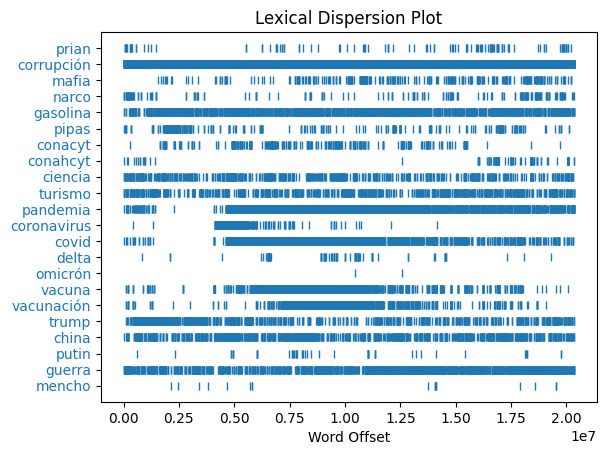

In [64]:
conf_tokenizadas.dispersion_plot(["prian", "corrupción", "mafia", "narco", "gasolina", "pipas",
                             "conacyt", "conahcyt", "ciencia","turismo", "pandemia", "coronavirus", "covid", "delta",
                             "omicrón", "vacuna", "vacunación","trump","china","putin","guerra","mencho"])

4. Muestre **50 colocaciones** del corpus.  


In [65]:
conf_tokenizadas.collocations(50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; por ciento; buenos días; todos los; nada más; señor
presidente; claudia sheinbaum; guardia nacional; sheinbaum pardo; por
eso; tren maya; adultos mayores; desde luego; mil millones; por
ejemplo; todas las; nuestro país; muy importante; baja california;
sobre todo; ramírez cuevas; poder judicial; quintana roo; creo que;
por qué; que que; jesús ramírez; sin embargo; derechos humanos; para
que; muchas gracias; tiene que; ver con; comisión federal; del estado;
los trabajadores; los jóvenes; muy bien; que nos; mucho gusto; garcía
luna; presidente.presidente andrés; este año; del pueblo; los pueblos;
que ver


5. Muestre un histograma con la longitud en caracteres de las palabras. Muestre el top 5 de longitudes más largas.   

In [85]:
from nltk import FreqDist
import matplotlib.pyplot as plt

word_lengths = [len(word) for word in tokens_tweettok]
freq_dist = FreqDist(word_lengths)

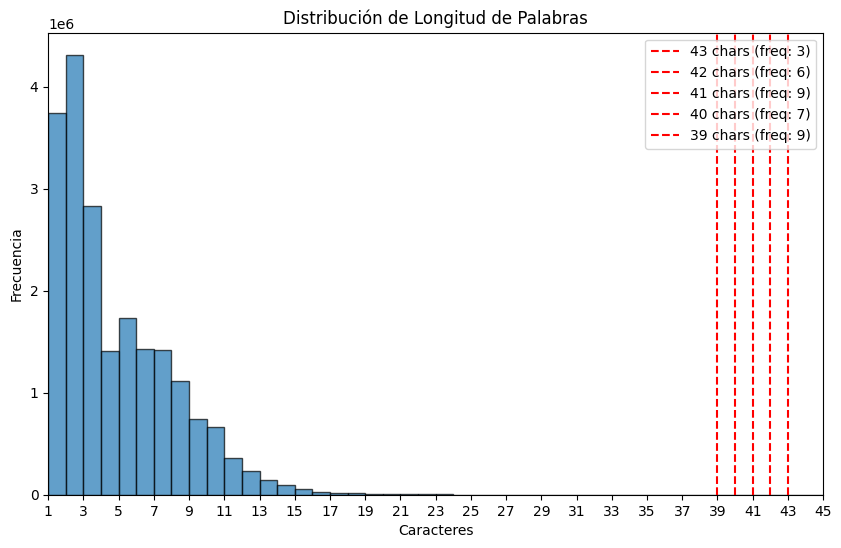

In [91]:
# longitudes con frecuencia mayor a 2
histo = {length: freq for length, freq in freq_dist.items() if freq > 2}
top_5 = sorted(histo.keys(), reverse=True)[:5]

plt.figure(figsize=(10, 6))

# Histograma
plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 1), edgecolor='black', alpha=0.7)
for length in top_5:
    plt.axvline(x=length, color='red', linestyle='--', linewidth=1.5, 
                label=f'{length} chars (freq: {histo[length]})')
plt.title("Distribución de Longitud de Palabras")
plt.xlabel("Caracteres")
plt.ylabel("Frecuencia")
plt.xlim(min(word_lengths), min(max(word_lengths), 45))
plt.xticks(range(min(word_lengths), min(max(word_lengths), 45) + 1, 2))
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

Podemos apreciar cómo se produce una distribución parecida a la Pareto, en la escala logarítmica parece una línea a 45°. 

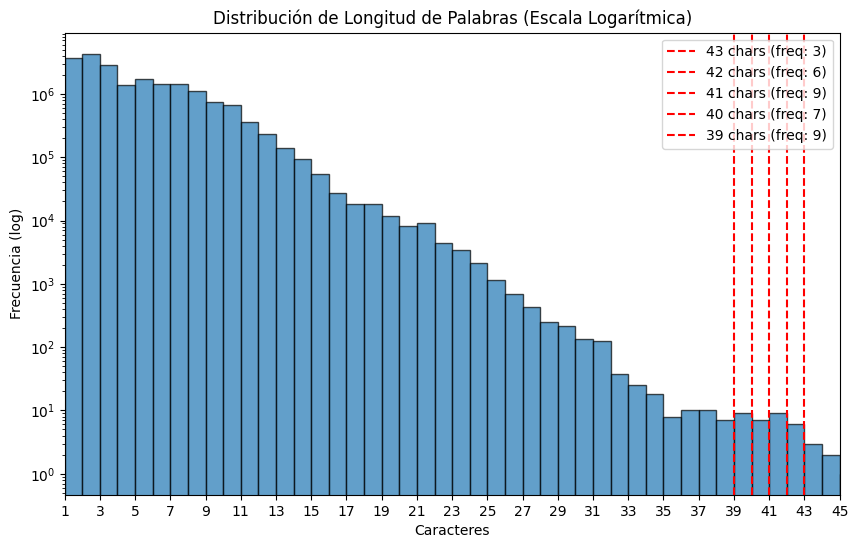

In [92]:
plt.figure(figsize=(10, 6))

plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 1), edgecolor='black', alpha=0.7, log=True)

for length in top_5:
    plt.axvline(x=length, color='red', linestyle='--', linewidth=1.5, 
                label=f'{length} chars (freq: {histo[length]})')

plt.title("Distribución de Longitud de Palabras (Escala Logarítmica)")
plt.xlabel("Caracteres")
plt.ylabel("Frecuencia (log)")
plt.xlim(1, min(max(word_lengths), 45))
plt.xticks(range(min(word_lengths), min(max(word_lengths), 45) + 1, 2))
plt.legend(loc='upper right')
plt.grid(False)

6. Muestre 50 palabras con más de 8 caracteres y frecuencia mayor a 5, utilizando *list comprehensions* en Python.  

In [98]:
freq_dist = FreqDist(tokens_tweettok)
[x for x in set(freq_dist) if len(x) > 8 and freq_dist[x] > 5 and "." not in x][:50]

['hemodiálisis',
 'derechosos',
 'ventanilla',
 'observaba',
 'favorables',
 'inspeccionados',
 'platicarles',
 'establecían',
 'realización',
 'enteraron',
 'entrelazan',
 'diplomáticas',
 'remunerado',
 'comportamiento',
 'divididos',
 'financiadas',
 'jovencitas',
 'inmovilismo',
 'congelado',
 'carnicería',
 'maiceados',
 'acusándolos',
 'extremismos',
 'organizaciones',
 'correspondan',
 'privatizara',
 'recubrimiento',
 'enriquecimiento',
 'mediopuntos',
 'idealistas',
 'comparecencia',
 'contraten',
 'depositario',
 'reformamos',
 'influenciar',
 'nebulización',
 'ocurridos',
 'batopilas',
 'aumentarán',
 'inquietudes',
 'rotativos',
 'teya-mérida',
 'empezando',
 'moralización',
 'duplicidad',
 'identificado',
 'reconocían',
 'imperativo',
 'subsecretaría',
 'manifestantes']

7. Consulte [el libro de NLTK (Sección 1.5)](https://www.nltk.org/book/ch02.html) y proponga una **gráfica con `ConditionalFreqDist`** similar a la de dicha sección. **Elija las palabras a analizar.**  


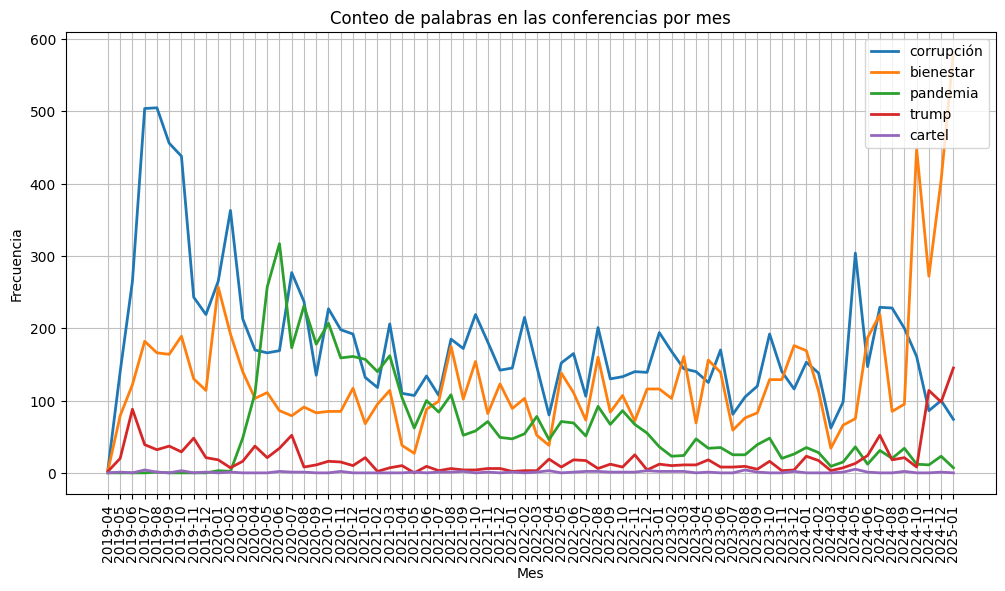

In [107]:
from nltk import ConditionalFreqDist

data = pl.read_parquet("data/transcripts.parquet")
fechas = data["Fecha"].to_list()
contenido = data["Contenido"].to_list()

tweet_tokenizer = TweetTokenizer()
tokens_tweettok = [tweet_tokenizer.tokenize(text.lower()) for text in contenido]

words = ["trump", "bienestar", "cartel", "pandemia", "corrupción"]

# Crear una lista de meses
bins = sorted(list(set(fecha[:7] for fecha in fechas)))  # Formato: YYYY-MM

cfdist = ConditionalFreqDist()

for i, fecha in enumerate(fechas):
    mes = fecha[:7]  # Extraer el año y mes
    for word in tokens_tweettok[i]:
        if word in words:
            cfdist[word][mes] += 1

plt.figure(figsize=(12, 6))
plt.title("Conteo de palabras en las conferencias por mes")
cfdist.plot()
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.show()

8. Utilizando la **lista de `stopwords` de NLTK**, obtenga la cantidad de palabras en los datos **con y sin stopwords**. **Comente las diferencias.**  


In [5]:
data = pl.read_parquet("data/transcripts.parquet")
all_text = " ".join(data["Contenido"].to_list())
all_text = all_text.lower()

tweet_tokenizer = TweetTokenizer()
tokens_tweettok = tweet_tokenizer.tokenize(all_text)
stopwords = nltk.corpus.stopwords.words('spanish')


In [12]:
stopwords_es = set(stopwords)
total_words_stopwords = len(tokens_tweettok)
tokens_sin_stopwords = [word for word in tokens_tweettok if word not in stopwords_es]
total_words_sin_stopwords = len(tokens_sin_stopwords)

print(f"Total de tokens (con stopwords): {total_words_stopwords}")
print(f"Total de tokens (sin stopwords): {total_palabras_sin_stopwords}")
print(f"Diferencia: {total_words_stopwords-total_words_sin_stopwords}")

riqueza = lexical_diversity(tokens_tweettok)
print(f"Diversidad léxica (con stopwords): {riqueza:.2f}")
riqueza_2 = lexical_diversity(tokens_sin_stopwords)
print(f"Diversidad léxica (sin stopwords): {riqueza_2:.2f}")

Total de tokens (con stopwords): 20360016
Total de tokens (sin stopwords): 11311277
Diferencia: 9048739
Diversidad léxica (con stopwords): 89.10
Diversidad léxica (sin stopwords): 49.56


Si filtramos el corpus usando las _stopwords_ en español vemos que el tamaño de nuestra lista se reduce casi a la mitad a pesar de que solo estamos quitando alrededor de 300 palabras, lo que tiene sentido ya que son las palabras que aparecen con mayor frecuencia en los documentos.

9. Muestre las **300 palabras más frecuentes** en las conferencias, excluyendo stopwords, ordenadas de mayor a menor frecuencia.

In [105]:
freq_dist = FreqDist(conftok_stopwords)
freq_dist.pprint(maxlen = 300)

FreqDist({',': 1705966, '.': 455490, ':': 142405, '¿': 86181, '?': 85991, 'presidente': 68727, ';': 58532, 'si': 56290, 'méxico': 54380, 'mil': 53115, 'va': 53052, 'lópez': 52575, 'vamos': 51835, 'manuel': 50591, 'obrador': 50214, 'andrés': 49388, 'aquí': 41199, 'entonces': 34700, 'gobierno': 33002, '‘': 30035, '’': 28853, 'ver': 28016, 'dos': 27892, 'ahora': 27808, 'pues': 26915, 'ahí': 25996, 'país': 25527, 'pueblo': 25446, 'millones': 25329, '…': 24204, 'cómo': 23801, 'caso': 23461, 'así': 23320, 'van': 23181, 'bueno': 22746, 'pesos': 22407, 'ser': 22041, 'nacional': 21211, 'hacer': 21194, 'gente': 20303, 'días': 20180, 'año': 19527, 'años': 19492, '-': 18915, 'ciento': 18886, 'usted': 18376, 'señor': 18120, 'tres': 17905, 'salud': 17719, '—': 17671, 'bien': 17654, 'decir': 17084, 'importante': 17060, 'poder': 16815, 'manera': 16679, 'parte': 16630, 'tener': 16543, 'puede': 16239, 'hace': 16073, 'todas': 16001, 'tema': 15750, 'día': 15675, 'mismo': 15636, 'tiempo': 15263, 'hoy': 149

## 4. Otras Librerías en Python 

1.  Mencione dos librerías en Python para NLP además de NLTK. Indique una ventaja y una desventaja de cada una.

**spaCy**:  
spaCy es una librería de Python diseñada específicamente para aplicaciones de producción en Procesamiento de Lenguaje Natural (NLP). Su principal ventaja es su alto rendimiento y eficiencia, ya que está optimizada para manejar grandes volúmenes de texto y ofrece modelos preentrenados para múltiples idiomas. Sin embargo, una desventaja es que su configuración y personalización pueden resultar complejas para usuarios principiantes, especialmente si se busca adaptar modelos a necesidades específicas. Más información en su [sitio oficial](https://spacy.io/).

**Transformers**:  
La librería Transformers, desarrollada por Hugging Face, es una de las más populares para trabajar con modelos de lenguaje preentrenados, como BERT, GPT y otros. Su ventaja principal es que permite acceder a modelos de última generación de manera sencilla, lo que facilita tareas avanzadas como traducción automática o generación de texto. No obstante, una desventaja es que puede ser computacionalmente costosa y requiere un buen entendimiento de los modelos de transformadores para aprovecharla al máximo. [documentación oficial](https://huggingface.co/transformers/).

---

2. Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes. De una ventaja y desventaja de cada una.

**Apache OpenNLP (Java)**:  
Apache OpenNLP es una librería de Java que ofrece herramientas para tareas comunes de NLP, como tokenización, etiquetado de partes del discurso y reconocimiento de entidades nombradas. Su ventaja radica en su robustez y buena documentación, lo que la hace accesible para desarrolladores con experiencia en Java. Sin embargo, una desventaja es que no es tan flexible como otras opciones modernas y puede requerir más configuración para tareas avanzadas. Más información en su [sitio oficial](https://opennlp.apache.org/).

**Stringr (R)**:  
Stringr es una librería de R que facilita la manipulación básica de cadenas de texto, como búsqueda, extracción y reemplazo de patrones. Su principal ventaja es su simplicidad y facilidad de uso, ideal para tareas de preprocesamiento en NLP. No obstante, una desventaja es que carece de funcionalidades avanzadas, como el uso de modelos de lenguaje, lo que limita su aplicación en proyectos más complejos. Puedes consultar su [documentación aquí](https://stringr.tidyverse.org/).

**TextAnalysis.jl (Julia)**:  
TextAnalysis.jl es una librería de Julia que proporciona herramientas básicas para NLP, como tokenización, stemming y análisis de sentimientos. Su ventaja es que aprovecha la velocidad y eficiencia de Julia, lo que la hace ideal para proyectos que requieren alto rendimiento. Sin embargo, una desventaja es que aún está en desarrollo y no cuenta con tantas funcionalidades avanzadas como otras librerías más maduras en otros lenguajes. Más detalles en su [repositorio de GitHub](https://github.com/JuliaText/TextAnalysis.jl).
